In [1]:
## Imports:

import sys

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec            # to arrange the plots nicely
from matplotlib.image import NonUniformImage
from matplotlib.patches import Rectangle
%matplotlib inline

import uproot                              # uproot for easy import of ROOT tree contents
import collections                         # used for named tuples
import pandas as pd
import math
import ast
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy import stats
from numpy import exp
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from scipy.interpolate import spline
from scipy.interpolate import make_interp_spline, BSpline
from scipy.interpolate import griddata
import random

In [2]:
## Function definitions:

def f_polar_R(cartesian_x, cartesian_y):
    return np.sqrt(cartesian_x * cartesian_x + cartesian_y * cartesian_y)

def f_polar_Phi(cartesian_x, cartesian_y):
    return np.arctan2(cartesian_y, cartesian_x)

def f_distance(x_a, y_a, x_b, y_b):
    return np.sqrt((x_b - x_a)**2 + (y_b - y_a)**2)


def flatten_tuples(tup):
    return np.array([element for tupl in tup for element in tupl])

def sum_tuple_subentries(tup):
    return [np.sum(tupl) for tupl in tup]

def nth_tuple_subentries(tup, n):
    return [tupl[n] for tupl in tup]


def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

In [3]:
## Available ROOT files in specified folder:
! ls /media/ab602/TOSHIBA\ EXT/Simulation_Data/LCE
! ls /media/alex/TOSHIBA\ EXT/Simulation_Data/LCE

optPhot_S1_1.0e+06_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509.root
optPhot_S1_1.0e+06_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse.root
optPhot_S1_1.0e+07_pmtGap0_RPTFE0.95_LXeAbs100_Tmesh0.89770509.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_run01.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_run02.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_run03.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_run04.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_run05.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_run06.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_wri

In [4]:
## Selection of file to be analyzed:
filename = '/media/ab602/TOSHIBA EXT/Simulation_Data/LCE/optPhot_S2_3.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse.root'

# filename prefix for automatically naming outputs

if filename[6:14] == 'Xebra_G4':
    filenameprefix = filename[:-5][15:]
    
elif filename[6:25] == 'Simulation_Data/Mod':
    filenameprefix = filename[:-5][44:]
    
elif filename[6:25] == 'Simulation_Data/LCE':
    filenameprefix = filename[:-5][26:]
    
elif filename[:45] == '/media/ab602/TOSHIBA EXT/Simulation_Data/LCE/':
    filenameprefix = filename[:-5][45:]
    
elif filename[:63] == '/media/ab602/TOSHIBA EXT/Simulation_Data/Modification_Spacer_3/':
    filenameprefix = filename[:-5][63:]
    
elif filename[:70] == '/media/ab602/TOSHIBA EXT/Simulation_Data/Influence_Optical_Parameters/':
    filenameprefix = filename[:-5][70:]
    
elif filename[:44] == '/media/alex/TOSHIBA EXT/Simulation_Data/LCE/':
    filenameprefix = filename[:-5][44:]
    
elif filename[:62] == '/media/alex/TOSHIBA EXT/Simulation_Data/Modification_Spacer_3/':
    filenameprefix = filename[:-5][62:]
    
elif filename[:69] == '/media/alex/TOSHIBA EXT/Simulation_Data/Influence_Optical_Parameters/':
    filenameprefix = filename[:-5][69:]

else:
    filenameprefix = 'filenameprefix'
    
print(filenameprefix)

optPhot_S2_3.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse


In [5]:
## Import as pandas dataframes

import pandas as pd

branches= ['xp_pri','yp_pri','zp_pri','nbpmthits','ntpmthits','pmthits'] # Be careful that the branches are also initilized in _chunk_collect

import concurrent.futures
executor = concurrent.futures.ThreadPoolExecutor(8)

_chunk_collect = pd.DataFrame({'xp_pri' : [],'yp_pri' : [],'zp_pri' : [],'nbpmthits' : [],'ntpmthits' : [],'pmthits' : []}) # Initialize empty data frame

for _chunk in uproot.iterate(filename, "events/events",branches, entrysteps=100000, 
                                       outputtype=pd.DataFrame, executor=executor):
    _chunk.columns=branches
    _chunk_collect = _chunk_collect.append(_chunk)
    print('.', end = '')

/home/ab602/anaconda3/lib/python3.7/site-packages/uproot/tree.py:116: FutureWarning: Int64Index.data is deprecated and will be removed in a future version
  index = awkward.numpy.frombuffer(arrays.index.data, dtype=arrays.index.dtype)


.................................................................................

In [6]:
_chunk_collect.head(6)

,xp_pri,yp_pri,zp_pri,nbpmthits,ntpmthits,pmthits
0,-26.018023,-21.398804,2.600604,0.0,1.0,"[0, 1, 0, 0, 0, 0, 0, 0]"
1,23.037119,-19.245794,3.360653,0.0,1.0,"[0, 0, 0, 0, 0, 0, 1, 0]"
2,9.584032,-31.743866,4.602115,0.0,1.0,"[0, 0, 0, 0, 0, 0, 1, 0]"
3,13.027063,30.361862,4.609910,1.0,0.0,"[1, 0, 0, 0, 0, 0, 0, 0]"
4,-26.654041,-9.645821,4.121455,1.0,0.0,"[1, 0, 0, 0, 0, 0, 0, 0]"
5,-3.062765,-1.170591,3.197469,1.0,0.0,"[1, 0, 0, 0, 0, 0, 0, 0]"


In [7]:
# Generate uniformly distributed random x-y-positions inside TPC

num_samples = int(5e5)                                  # number of samples
radius_TPC  = 35                                        # TPC radius in mm

np.random.seed(1234)                                    # random seed for reproducibility, only initialise once
r = radius_TPC * np.sqrt(np.random.rand(num_samples))   # random radius
p = np.random.rand(num_samples) * 2 * np.pi             # random polar angle

x_random = np.cos(p) * r                                # random x position
y_random = np.sin(p) * r                                # random y position

In [8]:
## Radius circular bins at above random positions
binradius = 0.5

## Initialise arrays with output information
nbin = np.full_like(np.ones(num_samples), np.nan, dtype=np.double) # number of total events in bin
ntpmthits = np.full_like(np.ones((7,num_samples)), np.nan, dtype=np.double) # number of top pmt hits in bin
HF = np.full_like(np.ones((7,num_samples)), np.nan, dtype=np.double) # hits fractions top PMTs

printlevel = 0
for i in range(0, num_samples):
    ## Select events inside respective bins
    mask_inside_bin = np.sqrt((_chunk_collect['xp_pri'] - x_random[i])**2 + 
                              (_chunk_collect['yp_pri'] - y_random[i])**2) < binradius

    ## Fill above arrays
    nbin[i] = mask_inside_bin.sum()
    ntpmthits_i = np.sum(_chunk_collect['pmthits'][mask_inside_bin])[1:]
    ntpmthits[:,i] = ntpmthits_i
    HF[:,i] = (ntpmthits_i / ntpmthits_i.sum())
    
    ## Print progress
    if i / num_samples >= printlevel:
        print(str(round(100 * round(printlevel, 2),1))+' %', end = ' ')
        printlevel += 0.01
print('100 %', end = ' ')

0 % 1.0 % 2.0 % 3.0 % 4.0 % 5.0 % 6.0 % 7.0 % 8.0 % 9.0 % 10.0 % 11.0 % 12.0 % 13.0 % 14.0 % 15.0 % 16.0 % 17.0 % 18.0 % 19.0 % 20.0 % 21.0 % 22.0 % 23.0 % 24.0 % 25.0 % 26.0 % 27.0 % 28.0 % 29.0 % 30.0 % 31.0 % 32.0 % 33.0 % 34.0 % 35.0 % 36.0 % 37.0 % 38.0 % 39.0 % 40.0 % 41.0 % 42.0 % 43.0 % 44.0 % 45.0 % 46.0 % 47.0 % 48.0 % 49.0 % 50.0 % 51.0 % 52.0 % 53.0 % 54.0 % 55.0 % 56.0 % 57.0 % 58.0 % 59.0 % 60.0 % 61.0 % 62.0 % 63.0 % 64.0 % 65.0 % 66.0 % 67.0 % 68.0 % 69.0 % 70.0 % 71.0 % 72.0 % 73.0 % 74.0 % 75.0 % 76.0 % 77.0 % 78.0 % 79.0 % 80.0 % 81.0 % 82.0 % 83.0 % 84.0 % 85.0 % 86.0 % 87.0 % 88.0 % 89.0 % 90.0 % 91.0 % 92.0 % 93.0 % 94.0 % 95.0 % 96.0 % 97.0 % 98.0 % 99.0 % 100 % 

In [9]:
filename_save = filenameprefix+"_random_positions_binradius_"+str(binradius)+"_mm_num_samples_"+"{:.1e}".format(num_samples)
random_positions = pd.DataFrame(data={'binradius': [binradius], 
                                      'x_random': [x_random], 'y_random': [y_random], 'nbin': [nbin], 
                                      'ntpmthits': [ntpmthits], 'HF': [HF]})
random_positions.to_pickle(filename_save+".pkl")
random_positions

,binradius,x_random,y_random,nbin,ntpmthits,HF
0,0.5,"[10.659855954335711, -3.4838675302460853, 13.0...","[10.999036219003761, 27.385140342081343, 19.10...","[1610.0, 1501.0, 1657.0, 1489.0, 1502.0, 1735....","[[37.0, 21.0, 18.0, 15.0, 55.0, 38.0, 30.0, 37...","[[0.046894803548795945, 0.029288702928870293, ..."


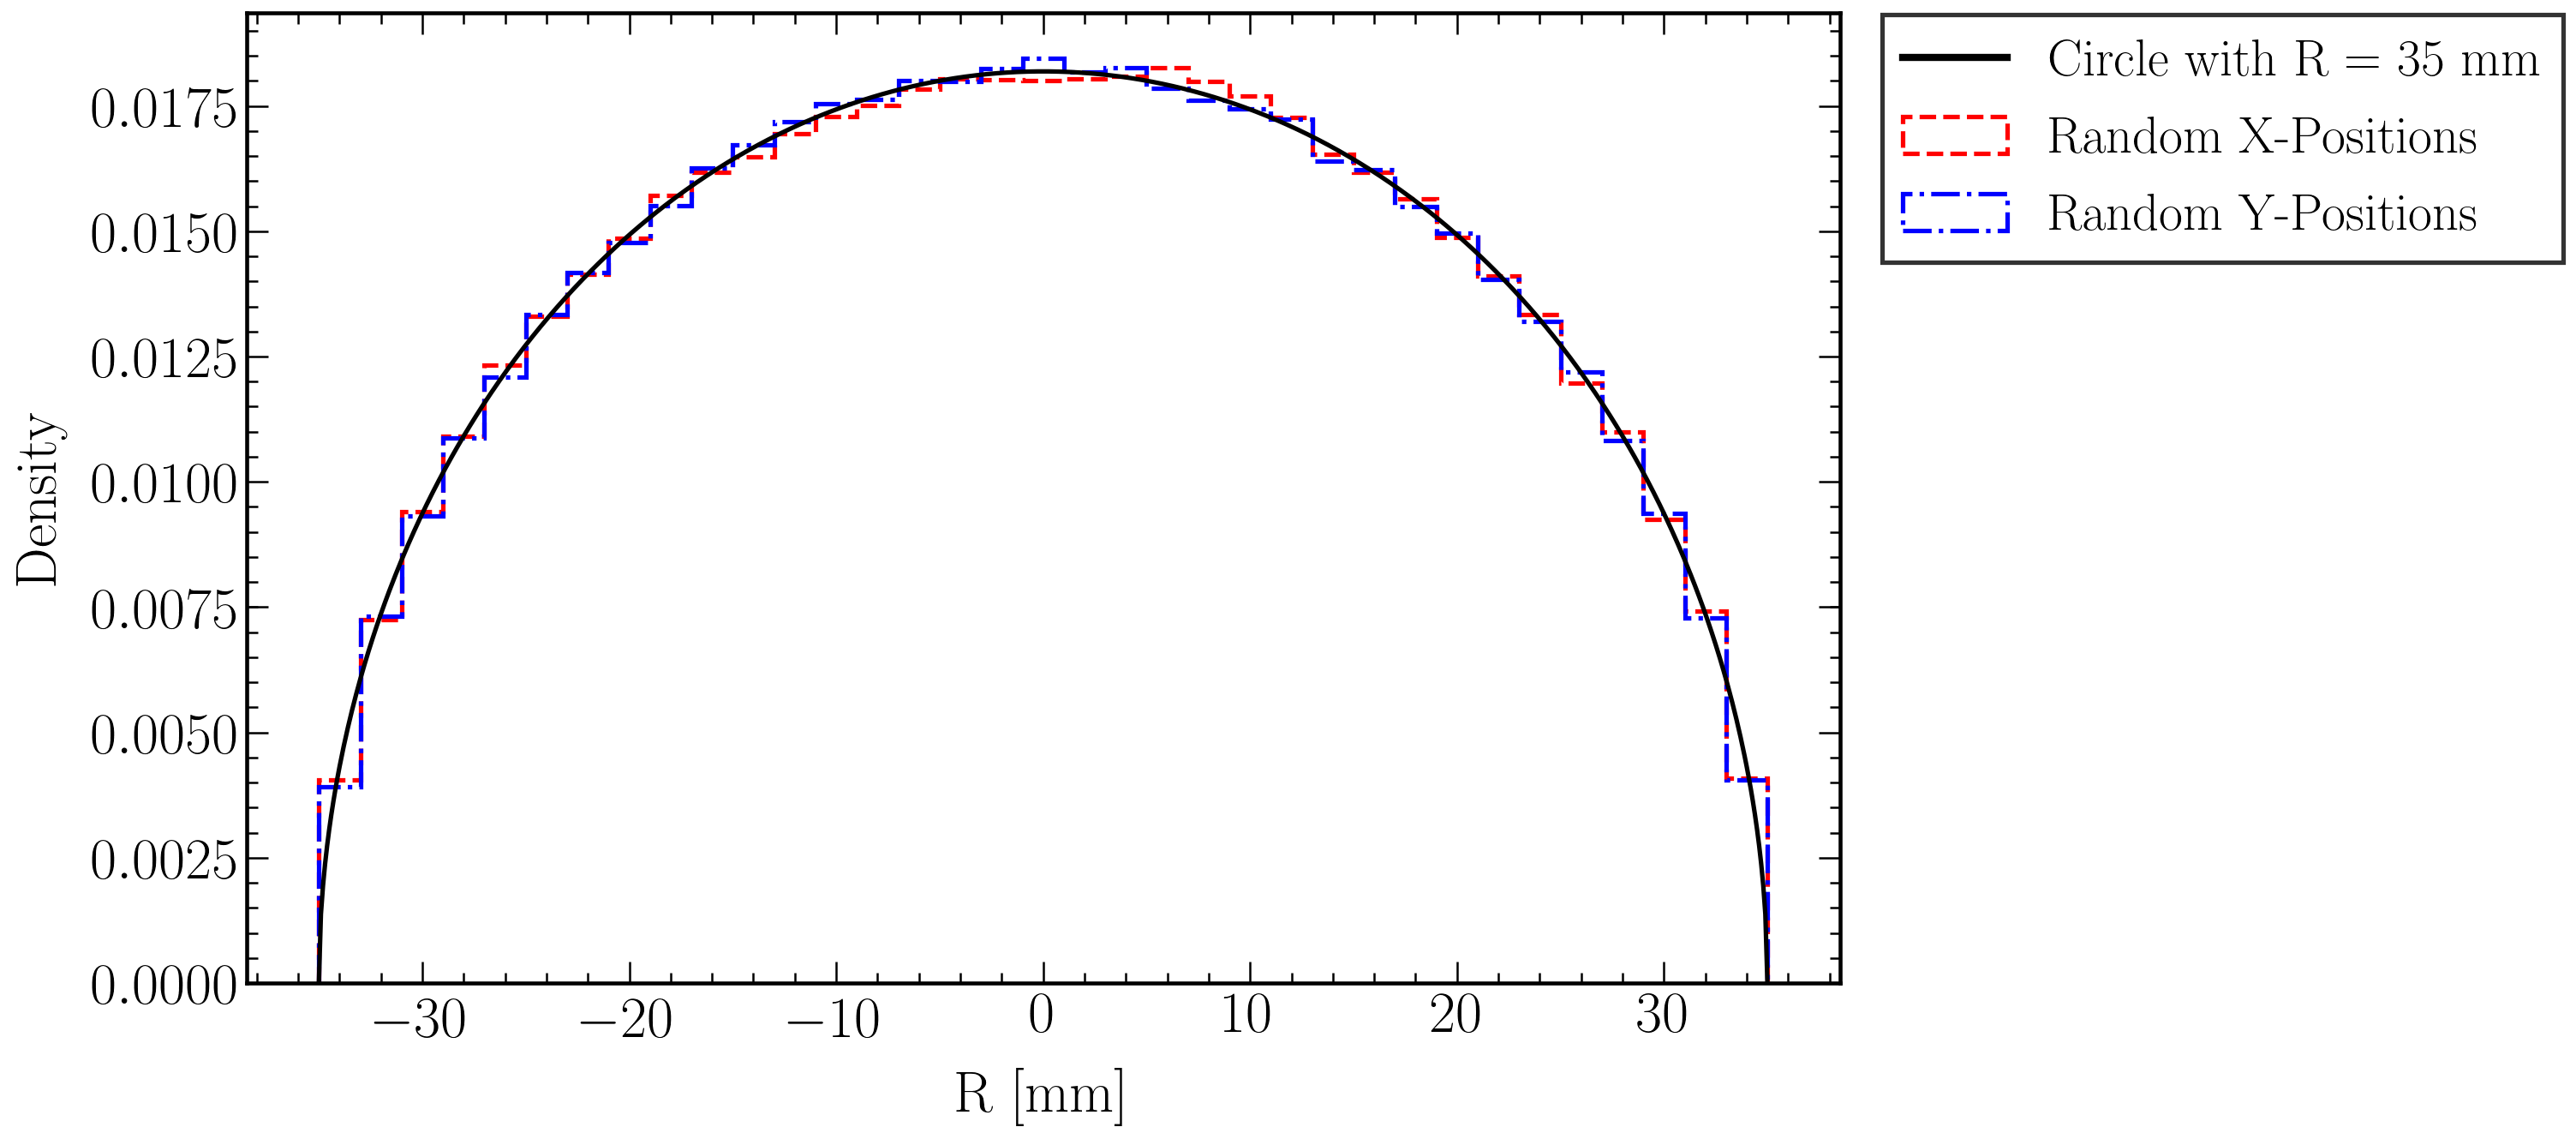

In [10]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot
pnts = np.linspace(-radius_TPC, radius_TPC, num=700)
plt.plot(pnts, np.sqrt(radius_TPC**2- pnts**2) / (np.pi * radius_TPC**2 / 2), 
         label = 'Circle with R = 35 mm', linewidth = 2.5, color = 'k')

plt.hist(random_positions['x_random'][0], bins = 35, range=(-radius_TPC, radius_TPC), histtype='step', density = True, 
         label = 'Random X-Positions', linewidth = 2.5, color = 'r', linestyle = '--')
plt.hist(random_positions['y_random'][0], bins = 35, range=(-radius_TPC, radius_TPC), histtype='step', density = True, 
         label = 'Random Y-Positions', linewidth = 2.5, color = 'b', linestyle = '-.')

plt.xlabel('R [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Accuracy Fiducialisation', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filename_save+"_hist.png", bbox_inches = "tight")
plt.show()

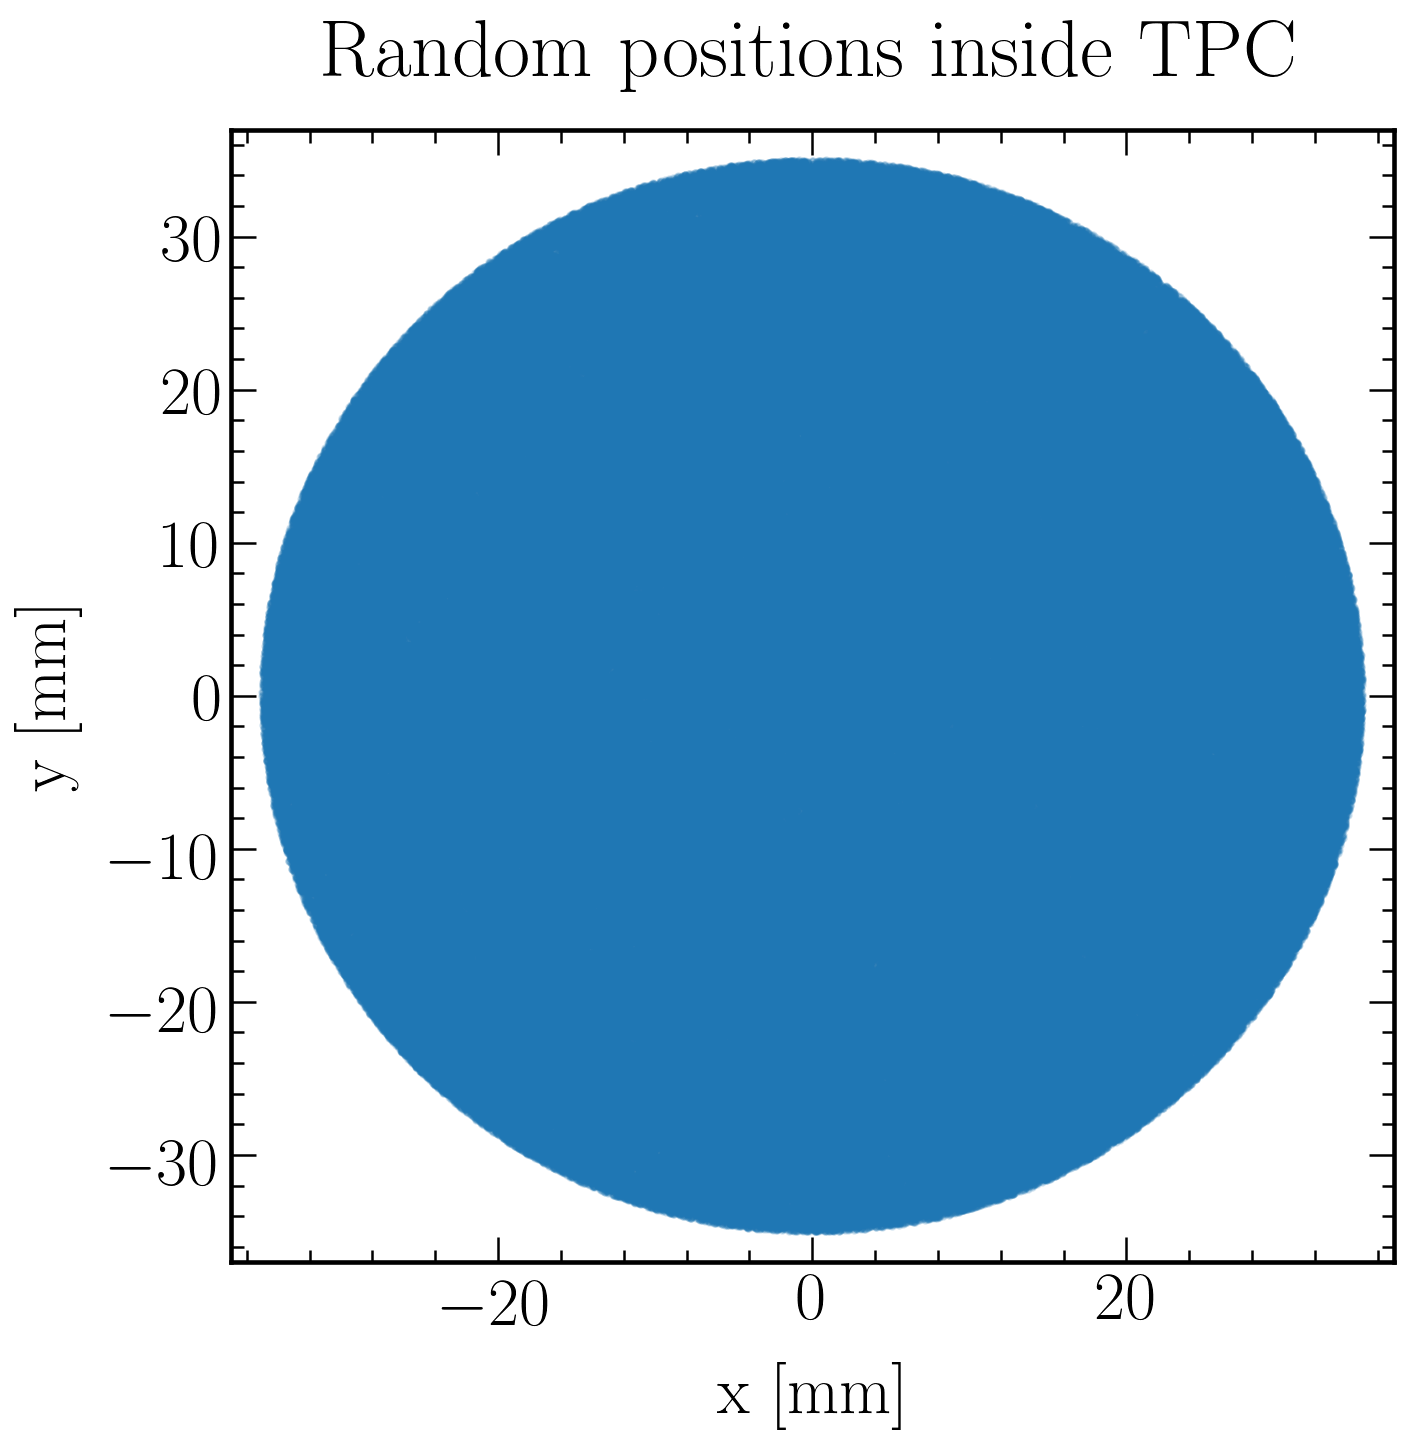

In [11]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(10, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot
plt.scatter(random_positions['x_random'][0],random_positions['y_random'][0], alpha = 0.2, marker = '.')

plt.xlim(-37,37)
plt.ylim(-37,37)

plt.xlabel('x [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('y [mm]', fontsize = label_size, labelpad = label_pad)
plt.title('Random positions inside TPC', fontsize = title_size, pad = title_pad)

fig.savefig(filename_save+"_scatter.png", bbox_inches = "tight")
plt.show()